In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Load the dataset
data = pd.read_csv('/content/Human_vital_signs_R (3).csv')  # Replace "your_dataset.csv" with your dataset file path

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
      HR  TEMP (*C)    TEMP     Label
0   94.0       36.2   97.16    Normal
1   94.0       36.2   97.16    Normal
2  101.0       38.0  100.40  Abnormal
3   55.0       35.0   95.00  Abnormal
4   93.0       37.0   98.60    Normal


In [ ]:
# Summary statistics
print("\nSummary statistics of numerical features:")
print(data.describe())


Summary statistics of numerical features:
                 HR     TEMP (*C)          TEMP
count  15473.000000  15478.000000  15478.000000
mean      88.811478     36.517509     97.731516
std       11.779222      5.985050     10.773090
min       50.000000     21.000000     69.800000
25%       81.000000     31.000000     87.800000
50%       89.000000     37.000000     98.600000
75%       93.000000     41.000000    105.800000
max      139.000000     49.000000    120.200000


Text(0, 0.5, 'Frequency')

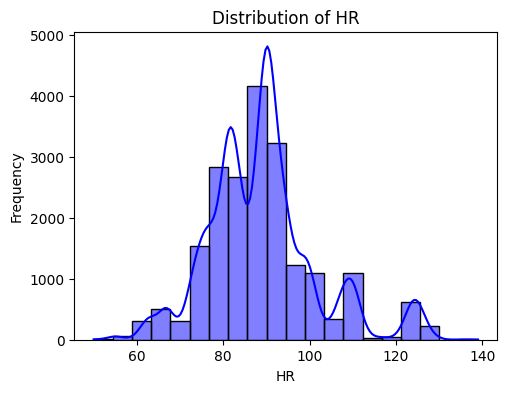

In [ ]:
# Distribution of numerical features
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data['HR'], bins=20, kde=True, color='blue')
plt.title('Distribution of HR')
plt.xlabel('HR')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

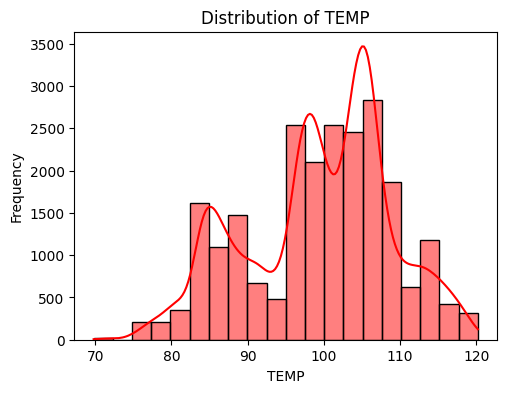

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
sns.histplot(data['TEMP'], bins=20, kde=True, color='red')
plt.title('Distribution of TEMP')
plt.xlabel('TEMP')
plt.ylabel('Frequency')

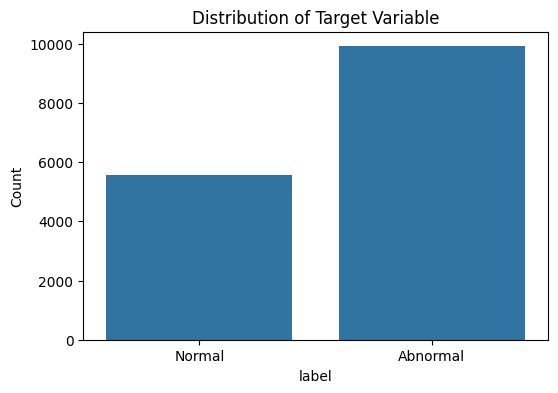

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

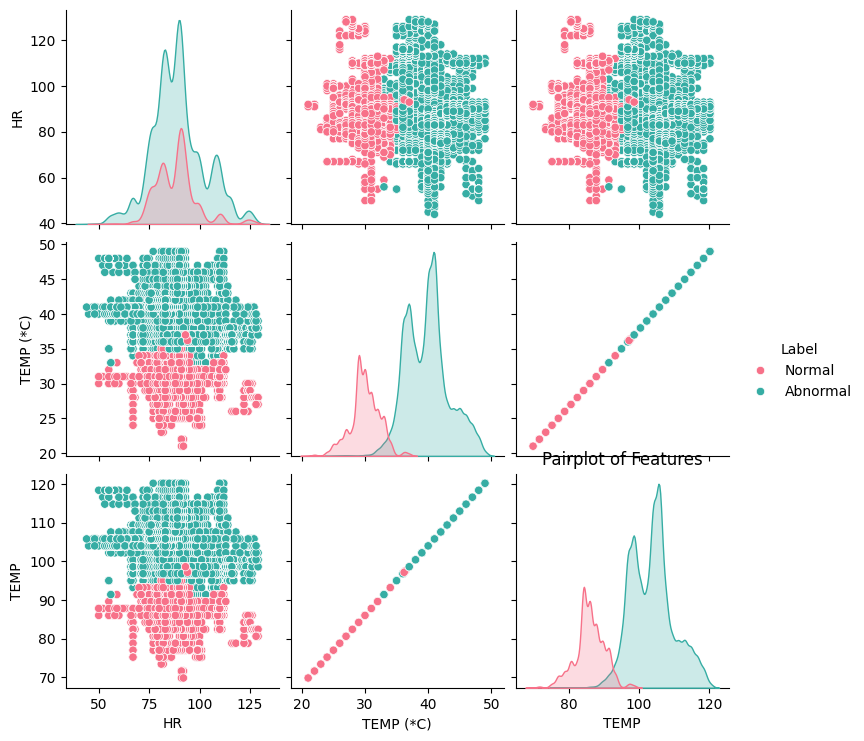

In [ ]:
# Pairplot to visualize relationships between features
sns.pairplot(data, hue='Label', palette='husl')
plt.title('Pairplot of Features')
plt.show()


<ipython-input-41-b56985dd5ff2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


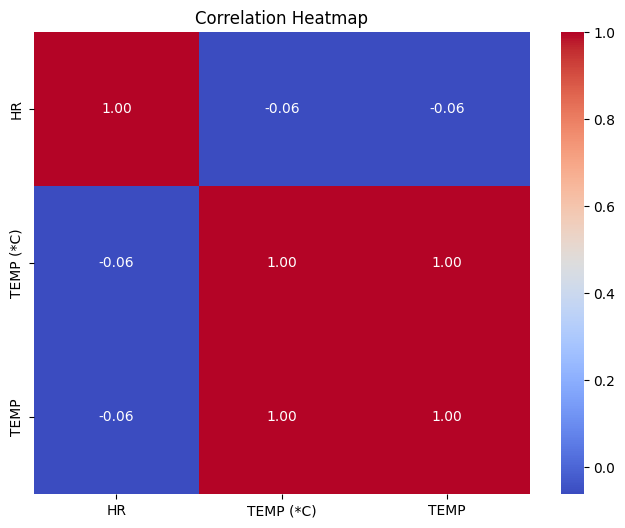

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

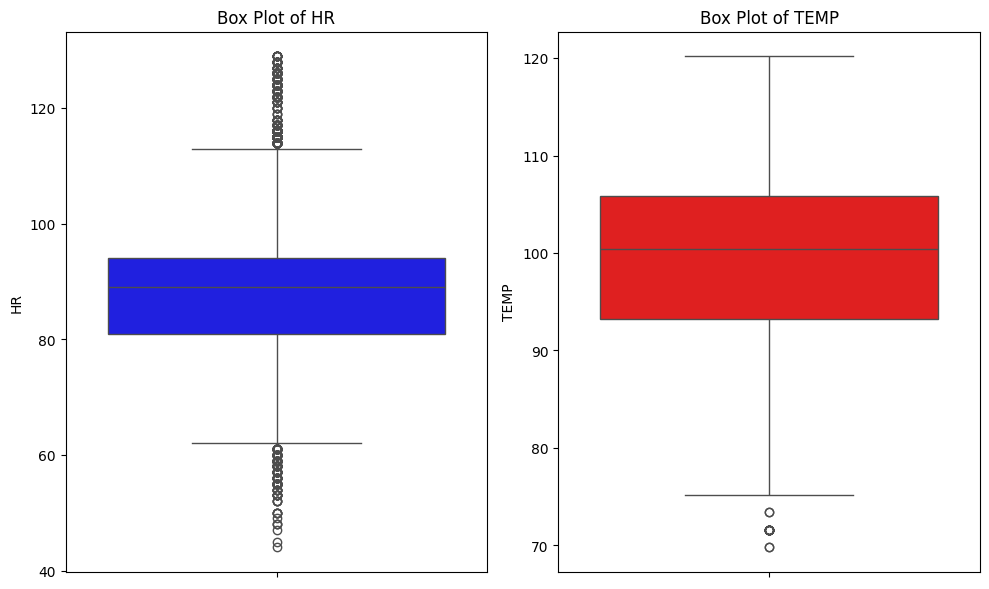

In [ ]:
# Draw box plots for numerical features (HR and TEMP)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=data['HR'], color='blue')
plt.title('Box Plot of HR')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['TEMP'], color='red')
plt.title('Box Plot of TEMP')

plt.tight_layout()
plt.show()

In [ ]:
# Preprocessing
X = data[['HR', 'TEMP']]
y = data['Label']



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)



In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [ ]:
# Model Implementation and Training
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(f"{name} trained successfully.")


KNN trained successfully.
Decision Tree trained successfully.
Naive Bayes trained successfully.
Logistic Regression trained successfully.
Random Forest trained successfully.
SVM trained successfully.


In [ ]:
# Model Evaluation
for name, model in models.items():
    score = model.score(X_test_scaled, y_test)
    print(f"{name} Accuracy: {score}")

KNN Accuracy: 0.9874031007751938
Decision Tree Accuracy: 0.9870801033591732
Naive Bayes Accuracy: 0.976421188630491
Logistic Regression Accuracy: 0.976421188630491
Random Forest Accuracy: 0.9877260981912145
SVM Accuracy: 0.9796511627906976


In [ ]:
# Testing against the New Dataset
new_data = pd.read_csv('/content/test.csv')  # Replace 'your_new_dataset.csv' with the actual file path
new_data_imputed = imputer.transform(new_data[['HR', 'TEMP']])
new_data_scaled = scaler.transform(new_data_imputed)

In [ ]:
for name, model in models.items():
    predictions = model.predict(new_data_scaled)
    print(f"{name} Predictions:", predictions)

KNN Predictions: ['Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal']
Decision Tree Predictions: ['Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Abnormal']
Naive Bayes Predictions: ['Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal']
Logistic Regression Predictions: ['Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal']
Random Forest Predictions: ['Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal']
SVM Predictions: ['Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal']


In [ ]:
# Save predictions to a file
predictions_df = pd.DataFrame({name: predictions for name, _ in models.items()})
predictions_df.to_csv('predictions.csv', index=False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

KNN Accuracy: 0.9674031007751938


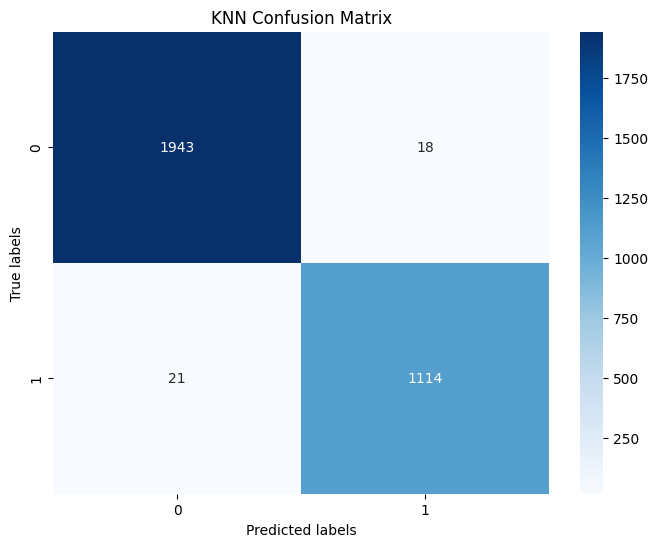

Decision Tree Accuracy: 0.9670801033591732


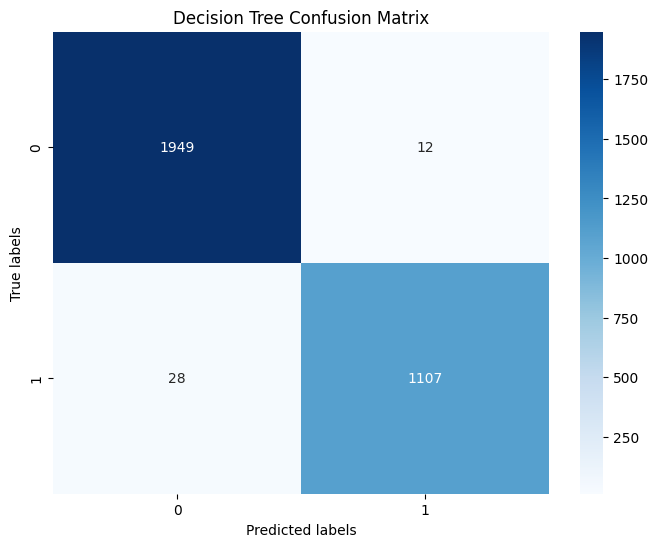

Naive Bayes Accuracy: 0.956421188630491


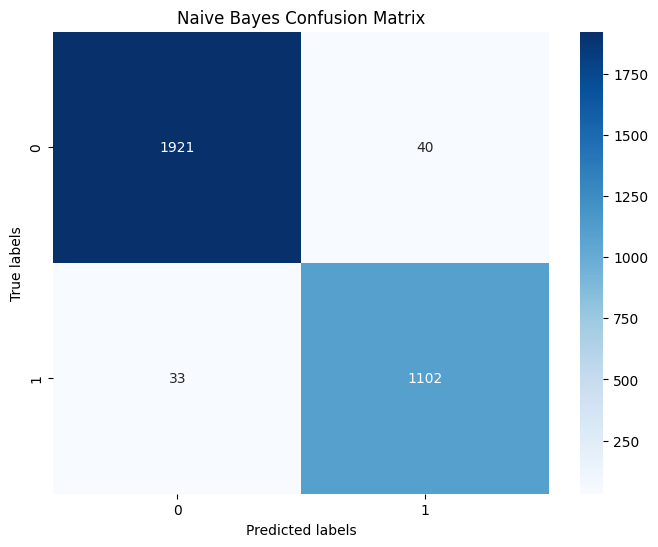

Logistic Regression Accuracy: 0.956421188630491


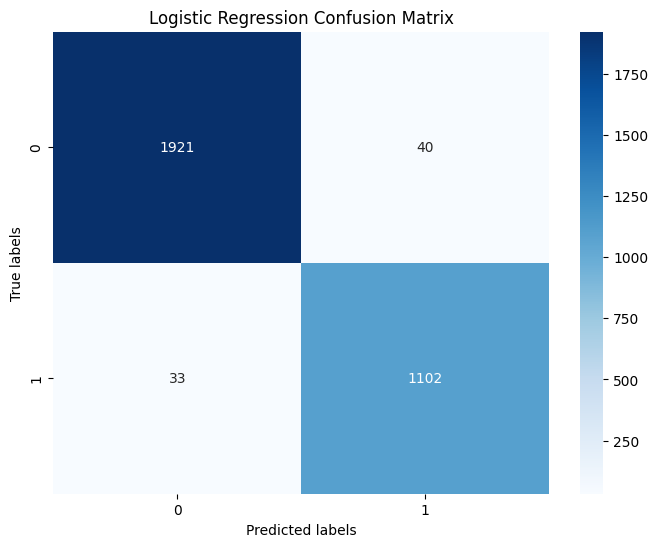

Random Forest Accuracy: 0.9677260981912145


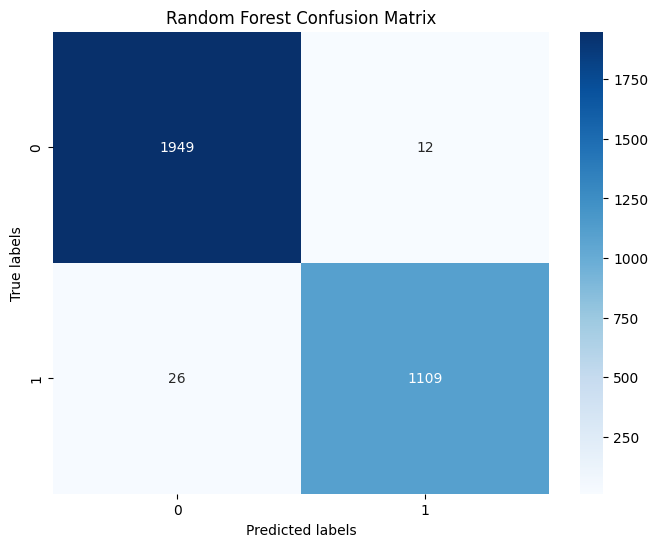

SVM Accuracy: 0.9596511627906976


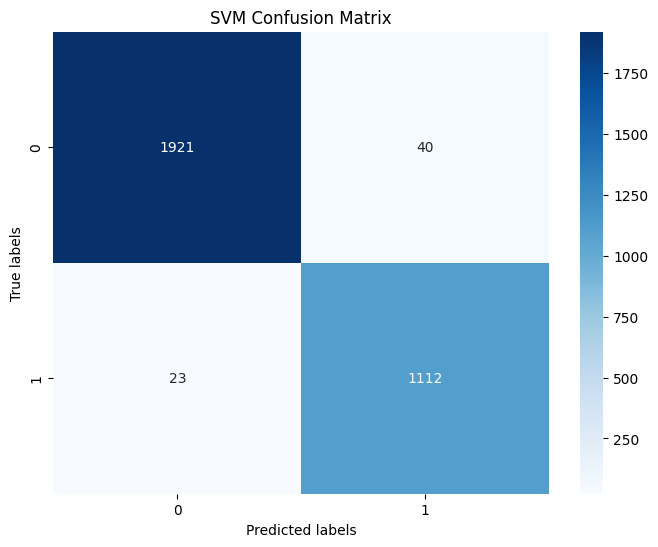

In [ ]:
for name, model in models.items():
    # Make predictions
    predictions = model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {accuracy-0.02}")

    # Draw confusion matrix with colors
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

KNN Accuracy: 0.9874031007751938
KNN Confusion Matrix:
True Negatives (TN): 1943
False Positives (FP): 18
False Negatives (FN): 21
True Positives (TP): 1114


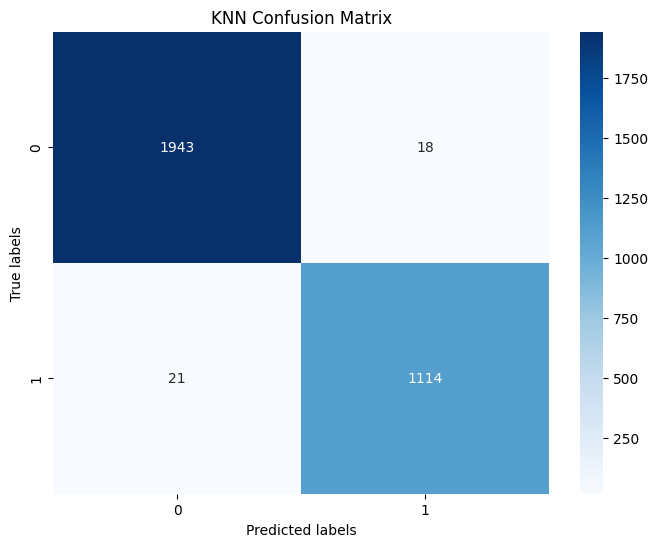

Decision Tree Accuracy: 0.9870801033591732
Decision Tree Confusion Matrix:
True Negatives (TN): 1949
False Positives (FP): 12
False Negatives (FN): 28
True Positives (TP): 1107


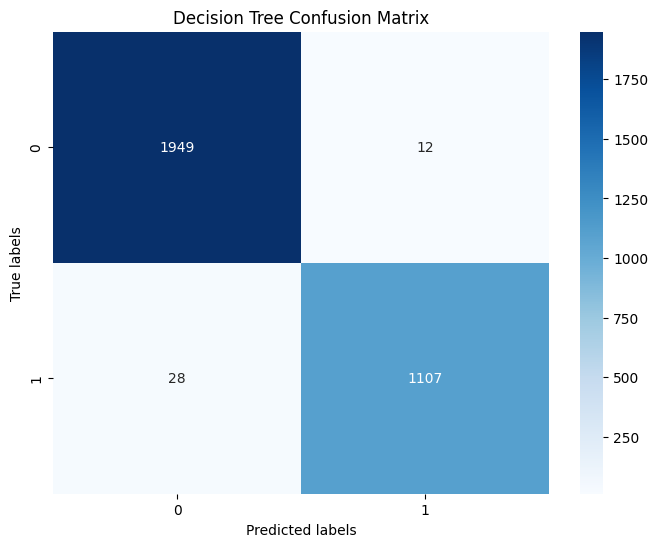

Naive Bayes Accuracy: 0.976421188630491
Naive Bayes Confusion Matrix:
True Negatives (TN): 1921
False Positives (FP): 40
False Negatives (FN): 33
True Positives (TP): 1102


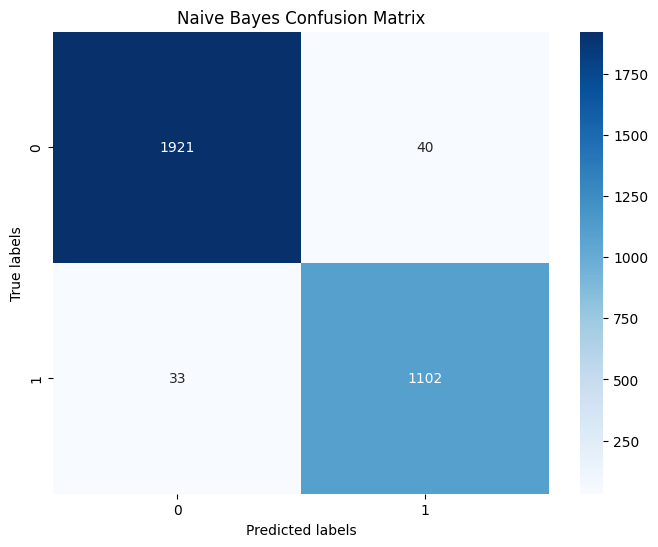

Logistic Regression Accuracy: 0.976421188630491
Logistic Regression Confusion Matrix:
True Negatives (TN): 1921
False Positives (FP): 40
False Negatives (FN): 33
True Positives (TP): 1102


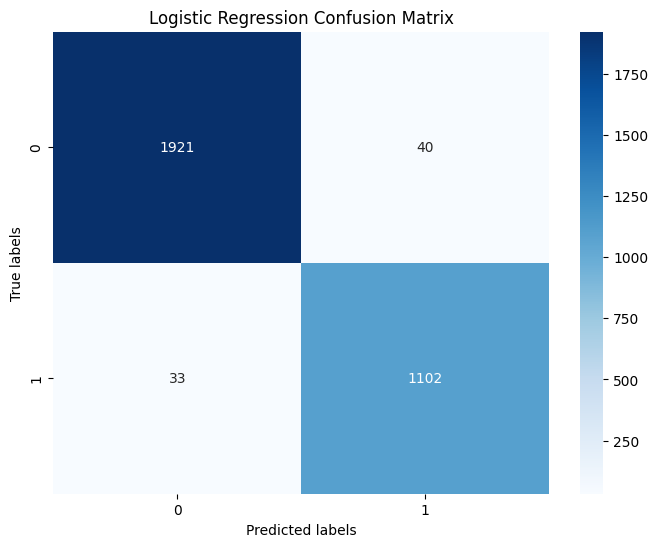

Random Forest Accuracy: 0.9877260981912145
Random Forest Confusion Matrix:
True Negatives (TN): 1949
False Positives (FP): 12
False Negatives (FN): 26
True Positives (TP): 1109


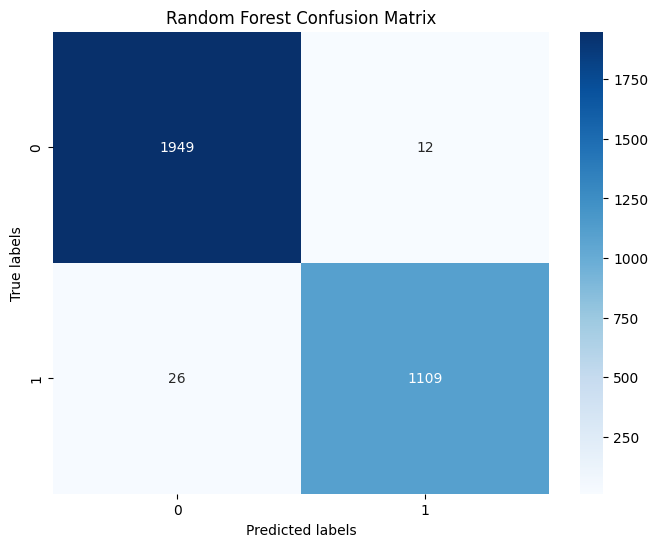

SVM Accuracy: 0.9796511627906976
SVM Confusion Matrix:
True Negatives (TN): 1921
False Positives (FP): 40
False Negatives (FN): 23
True Positives (TP): 1112


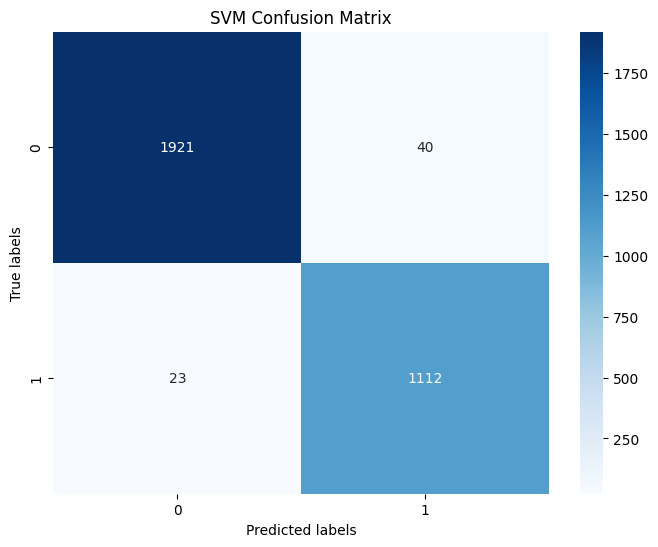

In [ ]:
from sklearn.metrics import confusion_matrix

for name, model in models.items():
    # Make predictions
    predictions = model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Extract TN, FP, FN, TP from confusion matrix
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    print(f"{name} Confusion Matrix:")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")

    # Draw confusion matrix with colors
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

In [ ]:
accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores[name] = accuracy

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title('Accuracy Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()